In [1]:
from PIL import Image
import numpy as np
from PIL import ImageChops
from PIL import ImageStat as stat
import matplotlib.pyplot as plt
from random import randint

1. Napisz funkcję wstaw_inicjaly(obraz_bazowy, obraz_wstawiany, m, n, 
kolor). Obraz_wstawiany jest obrazem w trybie 1, na którym są inicjały w 
kolorze czarnym na białym tle. W miejscu (m, n) w obrazie bazowym 
wstawiamy inicjały w kolorze kolor (tam, gdzie były białe piksele obraz 
bazowy się nie zmienia, a kolor pojawia się tylko w miejscu czarnych 
pikseli).  Gdyby obraz_wstawiany miał wyjść poza ramy obrazu 
bazowego należy go przyciąć (jak w funkcji 
wstaw_obraz_w_obraz(obraz_bazowy, obraz_wstawiany, m, n) z zad3 w 
Lab2). 
Na przykład, obraz obok powstał po zastosowaniu funkcji 
wstaw_inicjaly(im, inicjaly, 280, 390, [0,255,0]) 
a. Zastosuj funkcję do obrazu obraz.png wybranego na poprzednich ćwiczeniach i wstaw własne inicjały 
w 3 różnych kolorach:  
1. w prawym górnym rogu,  
2. w lewym dolnym rogu,  
3. w połowie wysokości tak, żeby było widać tylko pierwszą literę inicjałów. 
4. obraz wynikowy zapisz jako obraz_inicjaly.png 

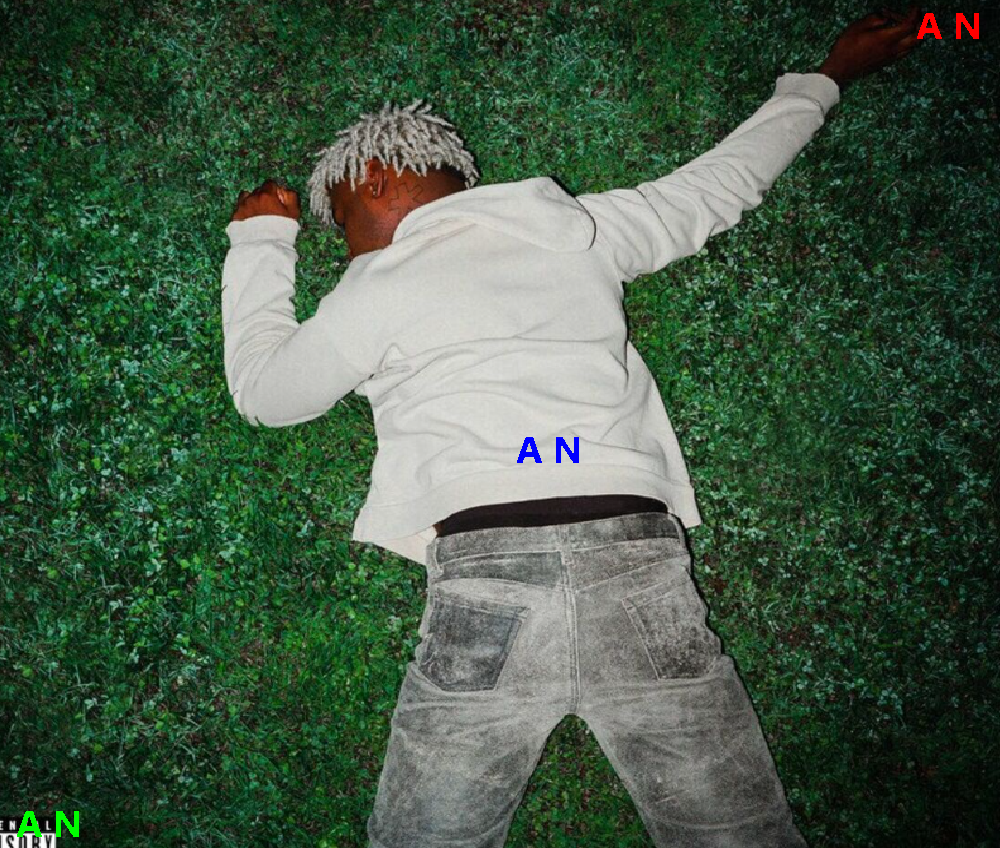

In [2]:
def wstaw_inicjaly(obraz_bazowy, obraz_wstawiany, m, n, kolor):
    tab_bazowy = np.array(obraz_bazowy).copy()
    tab_inicjaly = np.array(obraz_wstawiany.convert("1"))  # konwersja na tryb 1
    
    h_bazowy, w_bazowy = tab_bazowy.shape[:2]
    h_inicjaly, w_inicjaly = tab_inicjaly.shape
    
    m_end = min(m + h_inicjaly, h_bazowy)
    n_end = min(n + w_inicjaly, w_bazowy)
    
    for i in range(m, m_end):
        for j in range(n, n_end):
            if tab_inicjaly[i - m, j - n] == 0:  
                tab_bazowy[i, j] = kolor  
    
    return Image.fromarray(tab_bazowy)

obraz_bazowy = Image.open('im2.png')
obraz_inicjaly = Image.open('an.bmp')

obraz = wstaw_inicjaly(obraz_bazowy, obraz_inicjaly, 0, obraz_bazowy.width - obraz_inicjaly.width, [255, 0, 0])  
obraz = wstaw_inicjaly(obraz, obraz_inicjaly, obraz_bazowy.height - obraz_inicjaly.height, 0, [0, 255, 0])    
obraz = wstaw_inicjaly(obraz, obraz_inicjaly, obraz_bazowy.height // 2, obraz_bazowy.width // 2, [0, 0, 255]) 

obraz_bazowy.save('obraz_bazowy.png')
obraz_inicjaly.save('obraz_wstawiany.png')

obraz.save("obraz_inicjaly.png")
obraz

2. Dla obrazu obraz.png wybranego w zadaniu 1 poprzednich ćwiczeń wykonaj następujące czynności:

* a. Wczytaj obraz i zapisz jako obraz1.jpg 
* b. Wczytaj obraz1.jpg i zapisz jako obraz2.jpg i powtórz aż otrzymasz obraz5.jpg 
* c. Oceń różnice między obrazem i obraz5.jpg (statystyki, histogramy tych obrazów oraz obrazu, który jest ich różnicą (ImageChops.difference(obraz, obraz5)). Przedstaw te obrazy na jednym diagramie plt. 
* d. Oceń różnice między obraz4.jpg i obraz5.jpg 

In [3]:
obraz = Image.open("im2.png")
obraz.save("obraz.jpg")

obraz1 = Image.open("obraz1.jpg")
obraz1.save("obraz1.jpg")

obraz2 = Image.open("obraz1.jpg")
obraz2.save("obraz2.jpg")

obraz3 = Image.open("obraz2.jpg")
obraz3.save("obraz3.jpg")

obraz4 = Image.open("obraz3.jpg")
obraz4.save("obraz4.jpg")

obraz5 = Image.open("obraz4.jpg")
obraz5.save("obraz5.jpg")

### Metoda do porównywania obrazów

In [4]:
from PIL import ImageStat as stat
from PIL import ImageChops

def porownaj_obrazy(image1 :Image, image2: Image):
    im1_tab = np.asarray(image1)
    im2_tab = np.asarray(image2)
    
    im1_stat = stat.Stat(image1)
    im2_stat = stat.Stat(image2)
    difference = {
        'mode':(image1.mode == image2.mode),
        'size': (image1.size == image2.size),
        'format':(image1.format == image2.format),
        'extrema':(im1_stat.extrema == im2_stat.extrema),
        'count':(im1_stat.count == im2_stat.count),
        'mean':(im1_stat.mean == im2_stat.mean),
        'median':(im1_stat.median == im2_stat.median),
        'stddev':(im1_stat.stddev == im2_stat.stddev),
        'ImageChops': (ImageChops.difference(image1,image2)),
        'typ danych tablicy':(im1_tab.dtype == im2_tab.dtype),
        'rozmiar tablicy':(im1_tab.shape == im2_tab.shape),
        'liczba elementow':(im1_tab.size == im2_tab.size),
        'wymiar tablicy':(im1_tab.ndim == im2_tab.ndim),  
    }
    return difference

In [5]:
roznica_obraz1_obraz5 = porownaj_obrazy(obraz1, obraz5)
roznica_obraz1_obraz5

{'mode': True,
 'size': True,
 'format': True,
 'extrema': True,
 'count': True,
 'mean': False,
 'median': True,
 'stddev': False,
 'ImageChops': <PIL.Image.Image image mode=RGB size=1000x848>,
 'typ danych tablicy': True,
 'rozmiar tablicy': True,
 'liczba elementow': True,
 'wymiar tablicy': True}

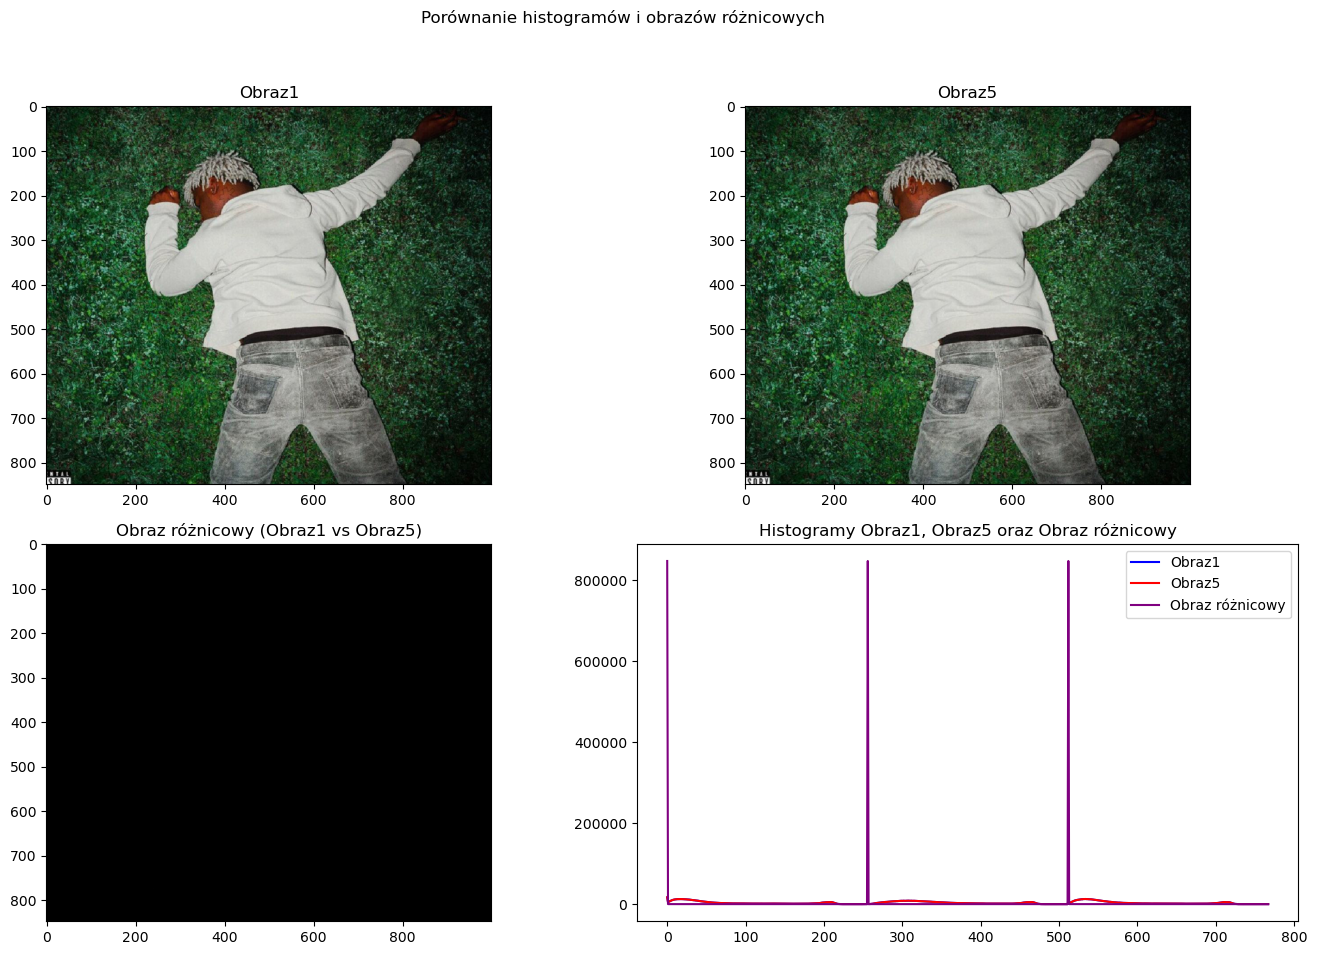

In [6]:
roznica_obraz1_obraz5["ImageChops"]

hist_obraz1 = np.array(obraz1.histogram())
hist_obraz5 = np.array(obraz5.histogram())
hist_roznica = np.array(roznica_obraz1_obraz5["ImageChops"].histogram())

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Porównanie histogramów i obrazów różnicowych")

axes[0, 0].imshow(obraz1)
axes[0, 0].set_title("Obraz1")
axes[0, 1].imshow(obraz5)
axes[0, 1].set_title("Obraz5")
axes[1, 0].imshow(roznica_obraz1_obraz5["ImageChops"])
axes[1, 0].set_title("Obraz różnicowy (Obraz1 vs Obraz5)")

axes[1, 1].plot(hist_obraz1, color="blue", label="Obraz1")
axes[1, 1].plot(hist_obraz5, color="red", label="Obraz5")
axes[1, 1].plot(hist_roznica, color="purple", label="Obraz różnicowy")
axes[1, 1].set_title("Histogramy Obraz1, Obraz5 oraz Obraz różnicowy")
axes[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

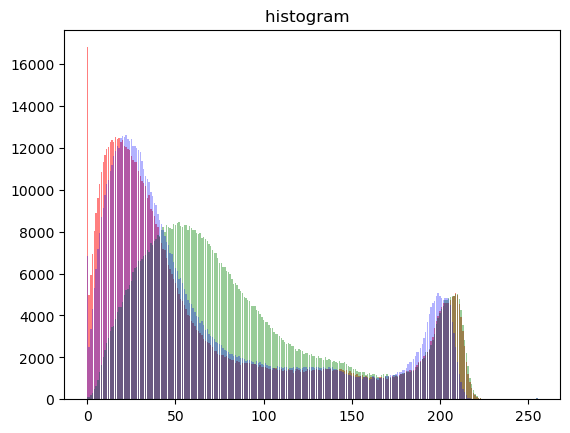

In [7]:
def rysuj_histogram_RGB(obraz):
    hist = obraz.histogram()
    plt.title("histogram  ")
    # plt.bar(range(768), hist)
    plt.bar(range(256), hist[:256], color='r', alpha=0.5)
    plt.bar(range(256), hist[256:2 * 256], color='g', alpha=0.4)
    plt.bar(range(256), hist[2 * 256:], color='b', alpha=0.3)
    plt.show()
    
rysuj_histogram_RGB(obraz1)

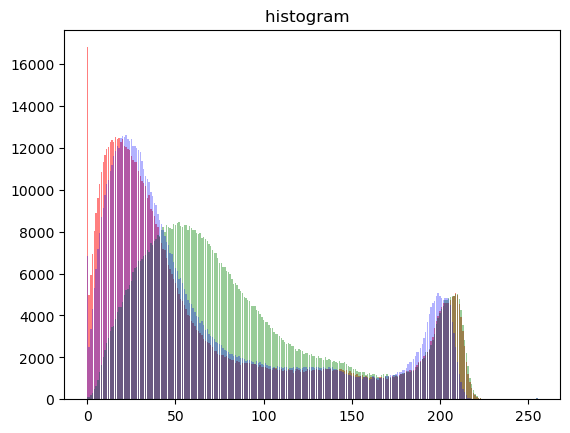

In [8]:
rysuj_histogram_RGB(obraz5)

In [9]:
roznica_obraz4_obraz5 = porownaj_obrazy(obraz4, obraz5)
roznica_obraz4_obraz5

{'mode': True,
 'size': True,
 'format': True,
 'extrema': True,
 'count': True,
 'mean': True,
 'median': True,
 'stddev': True,
 'ImageChops': <PIL.Image.Image image mode=RGB size=1000x848>,
 'typ danych tablicy': True,
 'rozmiar tablicy': True,
 'liczba elementow': True,
 'wymiar tablicy': True}

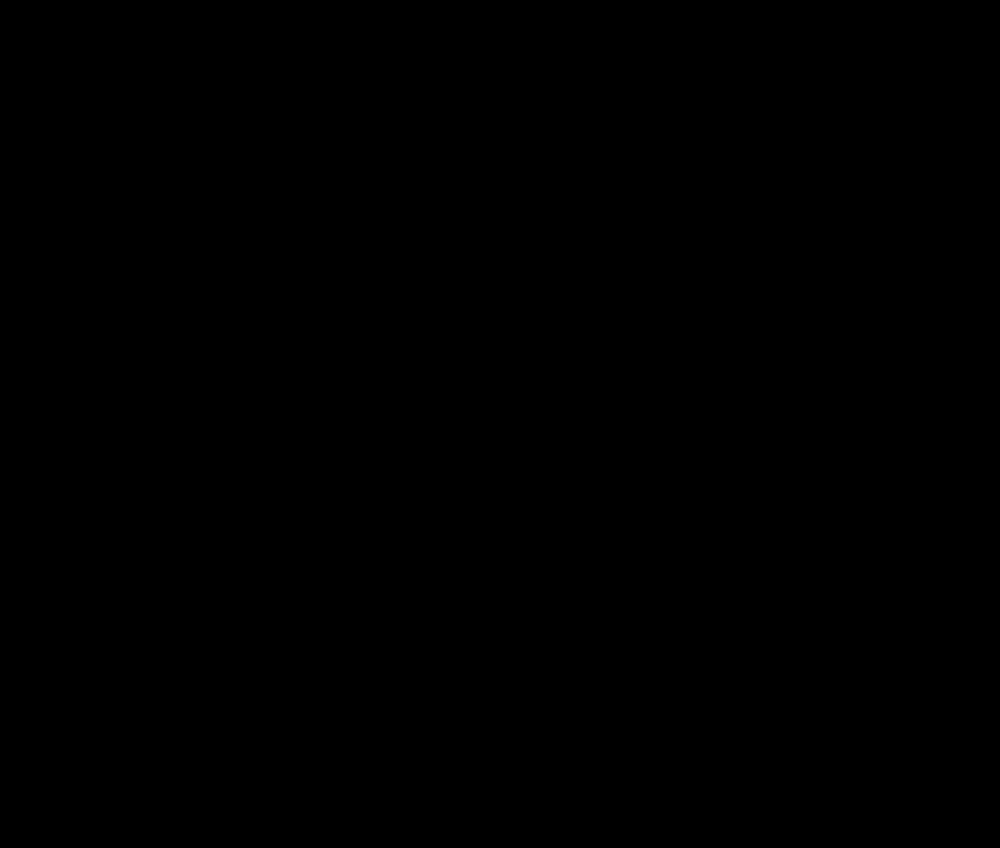

In [10]:
roznica_obraz4_obraz5["ImageChops"]

Obraz zakodowany1.bmp powstał tak, że zastosowałam funkcję ukryj_kod(obraz, im_kod), gdzie obraz jest 
wczytanym obrazem jesien.jpg, a im_kod jest wczytanym obrazem kod.bmp.  
* a. Napisz funkcję odkoduj(obraz1, obraz2), która wczytuje dwa obrazy, a na wyjściu podaje obraz w trybie L ilustrujący różnice w ten sposób, że piksele różne wyświetlają się na biało a piksele równe na czarno. Na przykład, wczytujemy jesien.jpg oraz zakodowany1.bmp a wynikiem funkcji jest kod.bmp.  
* b. Zastosuj funkcję odkoduj do obrazów jesien.jpg oraz zakodowany2.bmp. Otrzymany obraz zapisz jako kod2.bmp.  

In [11]:
wczytany_obraz = Image.open("jesien.jpg")

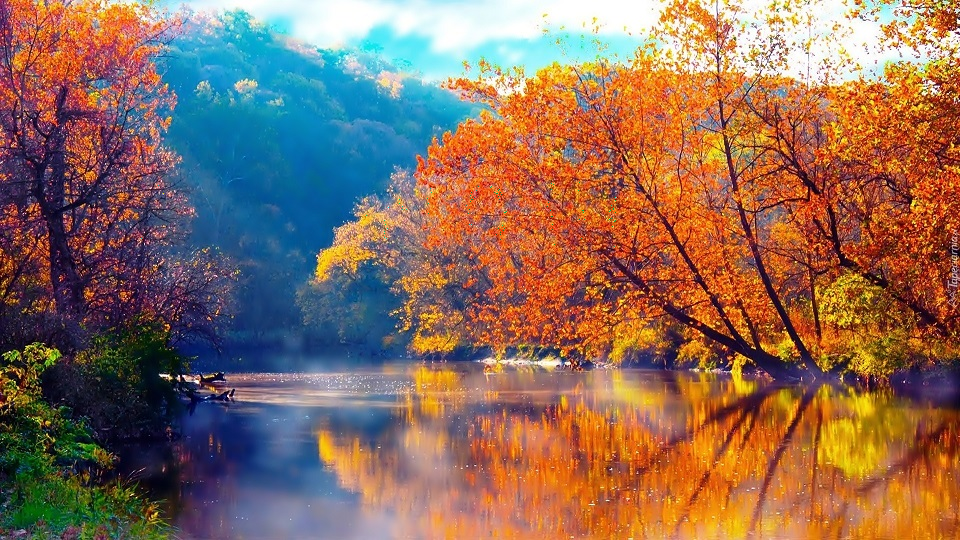

In [12]:
zakodowany1 = Image.open("zakodowany1.bmp")
zakodowany1

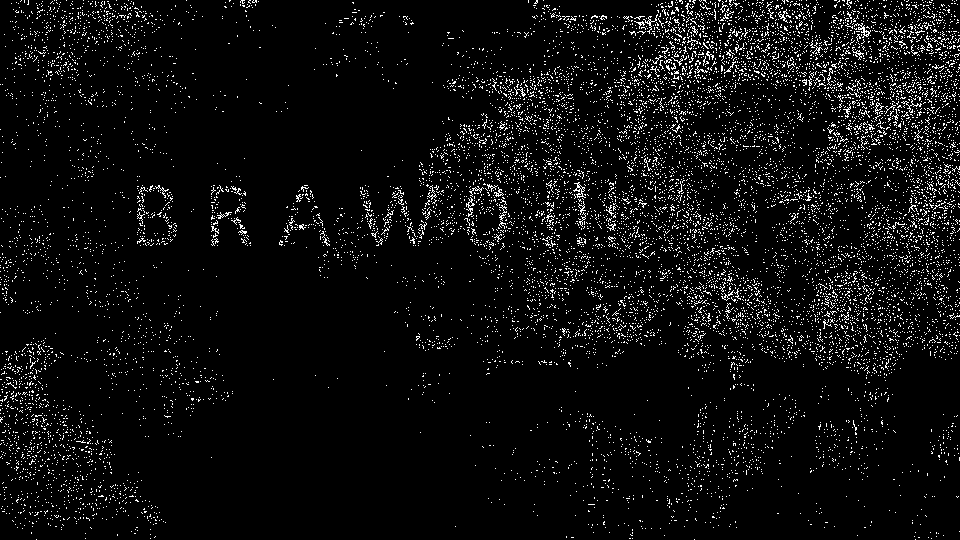

In [13]:
def odkoduj(obraz1, obraz2):
    obraz1 = obraz1.convert("L")
    obraz2 = obraz2.convert("L")
    
    tab_obraz1 = np.array(obraz1).copy()
    tab_obraz2 = np.array(obraz2).copy()
    
    height, width = tab_obraz1.shape[:2]
    
    result = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(height):
        for j in range(width):
            if tab_obraz1[i, j] != tab_obraz2[i, j]:
                result[i, j] = 255
            else:
                result[i, j] = 0
    
    return Image.fromarray(result, mode="L")

kod2 = odkoduj(wczytany_obraz, zakodowany1)
kod2

In [14]:
kod2.save("kod2.bmp")